# Naive Bayes'

The **Naive Bayes'** classification is regarded as _naive_ because it fundamentally assumes that the dependent values of a datapoint are independent from one another. If a dependent value influences another independent value, the **Naive Bayes'** classification is technically an invalid algorithm to use for the situation. The classification algorithm is based off of the **Bayes' Theorem**, which is:

$$\LARGE P(A | B) = \frac{P(B | A) \times P(A)}{P(B)}$$

The **Bayes' Theorem** states the probability that situation A is true when situation B is true is equal to the probability that situation B is true when situation A is true, over the total probability that situation B occurs. As seen, this helps find P($A | B$) after knowing P($B | A$). This will be necessary for the Naive Bayes' classifier equation:

$$\LARGE P(C^{i} | X) = \frac{P(X | C^{i}) \times P(C^i)}{P(X)}$$

__Where:__
* $C^i$ - The i<sup>th</sup> Classification
* $X$ - Features of a Datapoint
* $P(C^i)$ - Prior Probability
* $P(X)$ - Marginal Likelihood
* $P(X | C^i)$ - Likelihood
* $P(C^i | X)$ - Posterior Probability

The prior probability is equal to the datapoint count of the specified classification over the total datapoint count. Essentially, it is the probability of picking a certain classification given all datapoints. In the image shown below, $P(Red) = 10/30$.

<img src="Xfeatures.png" width="500px" alt="Similar datapoints surrounding the new datapoint."/>

The marginal likelihood is based on the datapoints surrounding the new datapoint. The radius of the search area around the new datapoint can be changed according to preference. In the image shown above, there are 4 datapoints with *similar features* to the new datapoint. The marginal likelihood is then equal to the number of similar datapoints over the total number of datapoints. In the image above, $P(X) = 4/30$.

<img src="similarClassifications.png" width="500px" alt="Classification datapoints similar to the new datapoint."/>

Lastly, the likelihood is based on the datapoints of the chosen classification. It is equal to the the number of i<sup>th</sup> classified datapoints similar to the new datapoint, over the __TOTAL__ number of i<sup>th</sup> classified datapoints. In the image above, it is equal to $P(X | Red) = 3/10$.

<hr>

These values can then be put into the **Bayes'** formula to get the posterior probability. The probability needs to be predicted for each classifier, but all the *posterior probabilities* add up to 1. So when having two classifiers, it is easy to figure out one *posterior probability* from another. Alternatively, the *marginal classifier* doesn't need to be calculated when comparing likelihood because it is the same for all classifiers:


$$\large \frac{P(X | C^{1}) \times P(C^1)}{P(X)} \text{ v.s. } \frac{P(X | C^{2}) \times P(C^2)}{P(X)} \rightarrow P(X | C^{1})  P(C^1) \text{ v.s. } P(X | C^{2}) P(C^2)$$

The new datapoint will then be assigned to a classifier that it has the highest chance of being.

<hr>

## Code

__Setting up the Dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Advertisements.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<hr>

__Fitting the Classifier & Making Predictions__

In [2]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

VERTICAL_ALIGNMENT = 1;
np.concatenate((
    y_pred.reshape(len(y_pred), VERTICAL_ALIGNMENT),
    y_test.reshape(len(y_pred), VERTICAL_ALIGNMENT)
    ), VERTICAL_ALIGNMENT)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0,

<hr>

__Creating the Confusion Matrix:__

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[65  3]
 [ 7 25]]
0.9


<hr>

__Visualizing Training Results:__

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


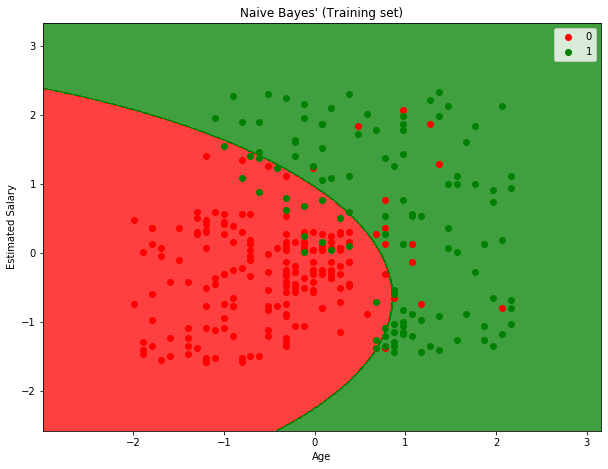

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


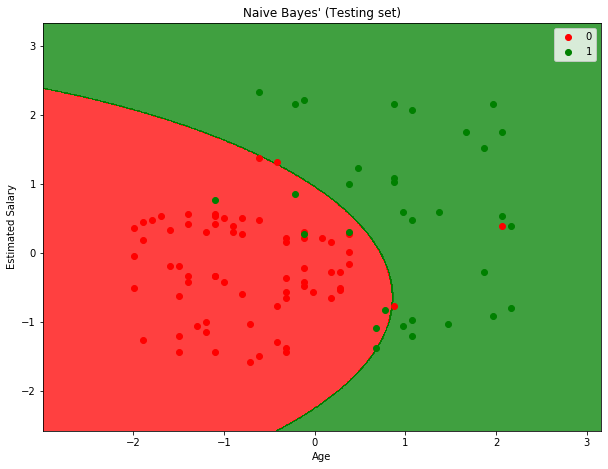

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

#Classification Plotter Function:
def display(X_set, y_set, type):
    from matplotlib.colors import ListedColormap
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Naive Bayes\' (' + type + ' set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#Displaying the results for the training and test sets.
display(X_train, y_train, 'Training')
display(X_test, y_test, 'Testing')